In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os 
from scipy.fft import fft

from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm

2022-05-03 11:55:52.707810: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
# Load pickle file
with open('/mnt/c/Users/pietr/uni/Intro_to_DL/group_project/denoise_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
print(len(data[0]))
print(len(data[1]))

print(data[0][0].shape)
print(data[1][0].shape) # the target is downsampled to half the dimension 

9600
9600
(11000,)
(5500,)


In [5]:
arrX=data[1]  # Downsampled
arry=data[0]  # Original

# make pandas.DataFrame out of the arrays
X=pd.DataFrame(arrX, columns=[str(i) for i in range(0, 5500)])
y=pd.DataFrame(arry, columns=[str(i) for i in range(0, 11000)])

# reshape to make it compatible with keras model
arr_X=np.reshape(arrX, (9600, 5500, 1))
arr_y=np.reshape(arry, (9600, 11000, 1))


print(X.shape)
print(y.shape)

(9600, 5500)
(9600, 11000)


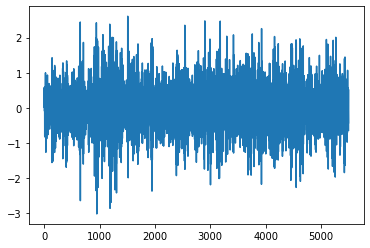

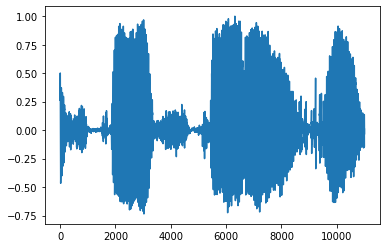

In [6]:
# Plot original and downsample random array (index=0)
X.iloc[0].plot()
plt.show()

y.iloc[0].plot()
plt.show()

/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


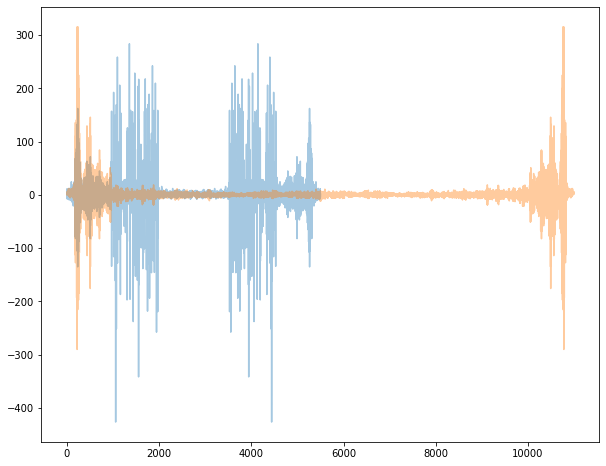

/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


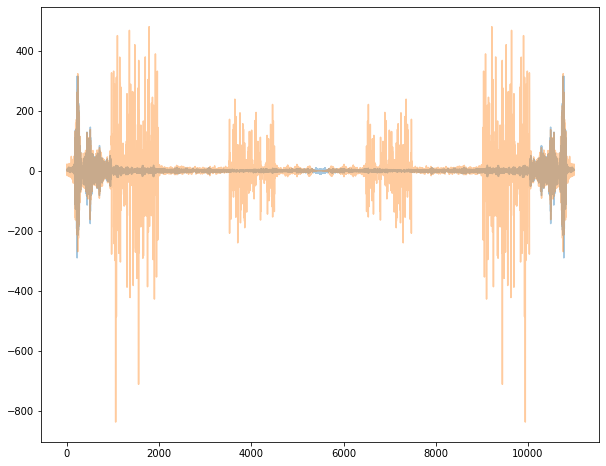

/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


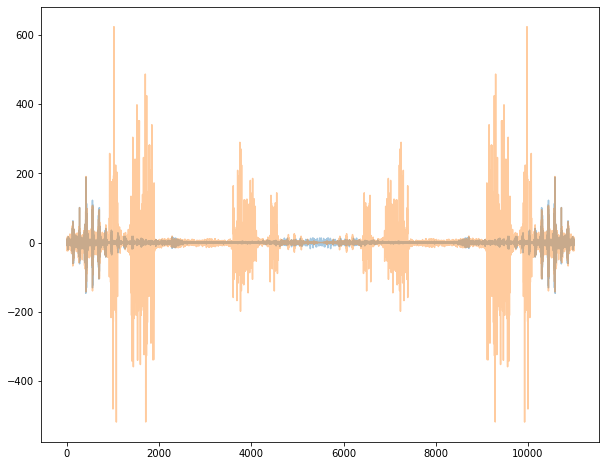

In [14]:
# Plotting the Fast Fourier Transform of the array of index=0

plt.figure(figsize=(10, 8))
plt.plot(fft(arrX[0]), alpha=0.4)
plt.plot(fft(arry[0]), alpha=0.4)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(fft(arry[0]), alpha=0.4)
array = arrX[0].repeat(2, axis = 0)  # interpolate downsampled array
plt.plot(fft(array), alpha=0.4)
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(fft(arry[54]), alpha=0.4)
array = arrX[54].repeat(2, axis = 0)  # interpolate downsampled array
plt.plot(fft(array), alpha=0.4)
plt.show()


# As you can see the noise is added only on some frequencies, if we interpolate the downsampled array 
# the overlap between the original and the downsampled array is clearly visible

# maybe we should clean the data before feeding it into an algorithm 

/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/piegarroni/miniconda3/envs/uni2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


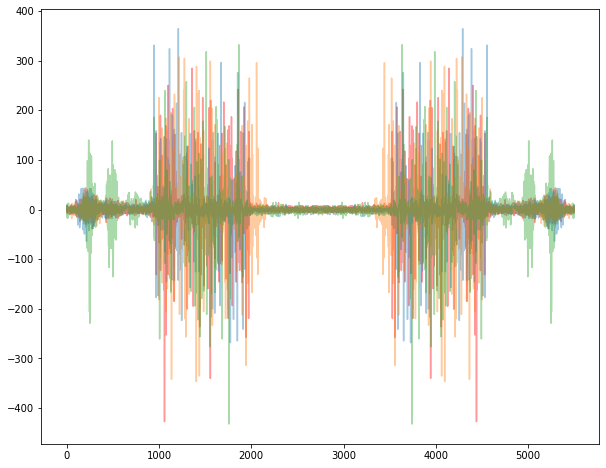

In [21]:
from scipy import signal
plt.figure(figsize=(10, 8))
array =  signal.resample(arry[0], 5500)
plt.plot(fft(arrX[0])-fft(array), alpha=0.4, color='red')
array =  signal.resample(arry[5], 5500)
plt.plot(fft(arrX[5])-fft(array), alpha=0.4)
array =  signal.resample(arry[45], 5500)
plt.plot(fft(arrX[45])-fft(array), alpha=0.4)
array =  signal.resample(arry[1445], 5500)
plt.plot(fft(arrX[1455])-fft(array), alpha=0.4)
plt.show()


In [8]:
import torch

print(torch.cuda.is_available())  # cannot get cuda to work with pytorch

False


In [9]:
# from here i adapted the code from: https://github.com/christianversloot/machine-learning-articles/blob/main/creating-a-signal-noise-removal-autoencoder-with-keras.md




from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())  # cuda works on keras


# Model configuration
input_shape = (11000, 1)
batch_size = 500
no_epochs = 5
train_test_split = 0.3
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14175092651393632428
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1717475739
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10933519219508634359
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


2022-05-03 11:57:12.734923: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-03 11:57:12.754069: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-03 11:57:14.196152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-03 11:57:14.199736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.057GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 163.

In [19]:
# Create the model

model = Sequential()
model.add(Conv1D(11000, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(11000, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv1DTranspose(500, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
#model.add(Conv1DTranspose(2000, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()

2022-04-29 11:32:18.519541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-29 11:32:18.519658: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.057GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 163.94GiB/s
2022-04-29 11:32:18.520685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-29 11:32:18.521888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-04-29 11:32:18.52192

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10998, 5500)       22000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10996, 500)        8250500   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10996, 1)          1501      
Total params: 8,274,001
Trainable params: 8,274,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')



arr_X2=[]
for i in arr_X:
    i=i.repeat(2, axis = 0)
    arr_X2.append(i)
    
arr_X2=np.array(arr_X2)


model.fit(arr_X2, arr_y,
    epochs=no_epochs,
    batch_size=batch_size,
    validation_split=validation_split)

2022-04-29 11:32:34.837174: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 337920000 exceeds 10% of free system memory.


In [ ]:
# Generate reconstructions
reconstructions = model.predict(X_test[0])


plt.plot(reconstructions)
plt.plot(y_test[0])
# Plot reconstructions
for i in np.arange(0, num_reconstructions):
    # Prediction index
    prediction_index = i + percentage_training
    # Get the sample and the reconstruction
    original = y_val_noisy[prediction_index]
    pure = y_val_pure[prediction_index]
    reconstruction = np.array(reconstructions[i])
    # Matplotlib preparations
    fig, axes = plt.subplots(1, 3)
    # Plot sample and reconstruciton
    axes[0].plot(original)
    axes[0].set_title('Noisy waveform')
    axes[1].plot(pure)
    axes[1].set_title('Pure waveform')
    axes[2].plot(reconstruction)
    axes[2].set_title('Conv Autoencoder Denoised waveform')
    plt.show()